### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

In [1]:
import pandas as pd
import os
import re
from sklearn.utils import resample
import numpy as np
import warnings
import seaborn
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from itertools import chain
from sklearn import datasets
from sklearn.feature_selection import RFE ,RFECV,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import f1_score, classification_report,multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
#!pip install imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# 1. Time Series Classification Part 1: Feature Creation/Extraction

# 1. (a) 
Download the AReM data

# 1. (b)
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

https://www.codegrepper.com/code-examples/python/iterate+over+folders+python

digits from str using regex :
https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python
https://www.askpython.com/python/string/extract-digits-from-python-string

In [2]:
directory = "../data/AReM/"
train_files = []
test_files = []

for root, subdirectories, files in os.walk(directory):

    if len(subdirectories) == 0:
        #print(root)
        folder_name = os.path.split(root)[1]
        #print("sub ", subdirectories)
        for file in files:
            file_num = re.findall("\d+", file)[0]
            file_path = os.path.join(root, file)
            if folder_name in ["bending1", "bending2"]:
                if int(file_num) < 3:
                    test_files.append(file_path)
                else:
                    train_files.append(file_path)
            else:
                if int(file_num) < 4:
                    test_files.append(file_path)
                else:
                    train_files.append(file_path)

In [3]:
print("We have : ", len(train_files), "train files \n")
print("Train data files - ", train_files)

We have :  69 train files 

Train data files -  ['../data/AReM/bending1/dataset7.csv', '../data/AReM/bending1/dataset6.csv', '../data/AReM/bending1/dataset4.csv', '../data/AReM/bending1/dataset5.csv', '../data/AReM/bending1/dataset3.csv', '../data/AReM/walking/dataset7.csv', '../data/AReM/walking/dataset6.csv', '../data/AReM/walking/dataset4.csv', '../data/AReM/walking/dataset5.csv', '../data/AReM/walking/dataset10.csv', '../data/AReM/walking/dataset11.csv', '../data/AReM/walking/dataset13.csv', '../data/AReM/walking/dataset12.csv', '../data/AReM/walking/dataset15.csv', '../data/AReM/walking/dataset14.csv', '../data/AReM/walking/dataset8.csv', '../data/AReM/walking/dataset9.csv', '../data/AReM/bending2/dataset6.csv', '../data/AReM/bending2/dataset4.csv', '../data/AReM/bending2/dataset5.csv', '../data/AReM/bending2/dataset3.csv', '../data/AReM/standing/dataset7.csv', '../data/AReM/standing/dataset6.csv', '../data/AReM/standing/dataset4.csv', '../data/AReM/standing/dataset5.csv', '../dat

In [4]:
print("We have : ", len(test_files), "test files \n")
print("Test data files - ", test_files)

We have :  19 test files 

Test data files -  ['../data/AReM/bending1/dataset1.csv', '../data/AReM/bending1/dataset2.csv', '../data/AReM/walking/dataset1.csv', '../data/AReM/walking/dataset2.csv', '../data/AReM/walking/dataset3.csv', '../data/AReM/bending2/dataset1.csv', '../data/AReM/bending2/dataset2.csv', '../data/AReM/standing/dataset1.csv', '../data/AReM/standing/dataset2.csv', '../data/AReM/standing/dataset3.csv', '../data/AReM/sitting/dataset1.csv', '../data/AReM/sitting/dataset2.csv', '../data/AReM/sitting/dataset3.csv', '../data/AReM/lying/dataset1.csv', '../data/AReM/lying/dataset2.csv', '../data/AReM/lying/dataset3.csv', '../data/AReM/cycling/dataset1.csv', '../data/AReM/cycling/dataset2.csv', '../data/AReM/cycling/dataset3.csv']


# 1. (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

ANS : Time series data, also referred to as time-stamped data, is a sequence of data points indexed in time order. Other than the fundamental min, max, mean, standard deviation, first quartile, and third quartile properties. Distribution, Correlation structure, Entropy, Scaling and Stationarity properties are typically utilized in time series categorization.


ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

https://www.geeksforgeeks.org/how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-pandas/

https://www.geeksforgeeks.org/python-pandas-dataframe-append/

https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
https://note.nkmk.me/en/python-pandas-dataframe-rename/

https://thispointer.com/how-to-drop-index-column-of-a-pandas-dataframe/

Filter warnings :
https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
https://docs.python.org/3/library/warnings.html

reorder columns :
https://datagy.io/reorder-pandas-columns/

-- minor changes in the below dataset in excel to remove extra comma 

AReM/cycling/dataset9.csv -> Error tokenizing data. C error: Expected 7 fields in line 485, saw 8

AReM/cycling/dataset14.csv -> Error tokenizing data. C error: Expected 7 fields in line 485, saw 8


In [5]:
time1 = pd.DataFrame()
time2 = pd.DataFrame()
time3 = pd.DataFrame()
time4 = pd.DataFrame()
time5 = pd.DataFrame()
time6 = pd.DataFrame()

for file in (train_files + test_files):
    #df = pd.read_csv(file, skiprows = 4, on_bad_lines='skip')
    #removed bad lines by removing excess commas in excel
    
    df = pd.read_csv(file, skiprows = 4)
    summary = df.describe()

    avg12 = df.describe()['avg_rss12']
    avg12 = avg12.rename(index = {'min': 'min1', 'max': 'max1', 'mean': 'mean1', '50%': 'median1', 'std': 'std1', '25%': '1st quart1', '75%': '3rd quart1'})
    avg12 = avg12.drop(index = ['count'])
    avg12 = avg12[['min1', 'max1', 'mean1',  'median1', 'std1', '1st quart1', '3rd quart1']]
    time1 = time1.append(avg12, ignore_index = True)
    
    
    var12 = df.describe()['var_rss12']
    var12 = var12.rename(index = {'min': 'min2', 'max': 'max2', 'mean': 'mean2', '50%': 'median2', 'std': 'std2', '25%': '1st quart2', '75%': '3rd quart2'})
    var12 = var12.drop(index = ['count'])
    var12 = var12[['min2', 'max2', 'mean2',  'median2', 'std2', '1st quart2', '3rd quart2']]
    time2 = time2.append(var12, ignore_index = True)
    
    
    avg13 = df.describe()['avg_rss13']
    avg13 = avg13.rename(index = {'min': 'min3', 'max': 'max3', 'mean': 'mean3', '50%': 'median3', 'std': 'std3', '25%': '1st quart3', '75%': '3rd quart3'})
    avg13 = avg13.drop(index = ['count'])
    avg13 = avg13[['min3', 'max3', 'mean3',  'median3', 'std3', '1st quart3', '3rd quart3']]
    time3 = time3.append(avg13, ignore_index = True)
    
    
    var13 = df.describe()['var_rss13']
    var13 = var13.rename(index = {'min': 'min4', 'max': 'max4', 'mean': 'mean4', '50%': 'median4', 'std': 'std4', '25%': '1st quart4', '75%': '3rd quart4'})
    var13 = var13.drop(index = ['count'])
    var13 = var13[['min4', 'max4', 'mean4',  'median4', 'std4', '1st quart4', '3rd quart4']]
    time4 = time4.append(var13, ignore_index = True)
    
    
    avg23 = df.describe()['avg_rss23']
    avg23 = avg23.rename(index = {'min': 'min5', 'max': 'max5', 'mean': 'mean5', '50%': 'median5', 'std': 'std5', '25%': '1st quart5', '75%': '3rd quart5'})
    avg23 = avg23.drop(index = ['count'])
    avg23 = avg23[['min5', 'max5', 'mean5',  'median5', 'std5', '1st quart5', '3rd quart5']]
    time5 = time5.append(avg23, ignore_index = True)
    
    
    var23 = df.describe()['var_rss23']
    var23 = var23.rename(index = {'min': 'min6', 'max': 'max6', 'mean': 'mean6', '50%': 'median6', 'std': 'std6', '25%': '1st quart6', '75%': '3rd quart6'})
    var23 = var23.drop(index = ['count'])
    var23 = var23[['min6', 'max6', 'mean6',  'median6', 'std6', '1st quart6', '3rd quart6']]
    time6 = time6.append(var23, ignore_index = True)


In [6]:
print("time-domain features for avg rss12 is :\n" , time1, "\n")
print("time-domain features for var rss12 is :\n" , time2, "\n")
print("time-domain features for avg rss13 is :\n" , time3, "\n")
print("time-domain features for var rss13 is :\n" , time4, "\n")
print("time-domain features for avg rss13 is :\n" , time5, "\n")
print("time-domain features for ar rss23 is :\n" , time6, "\n")

time-domain features for avg rss12 is :
      min1   max1      mean1  median1      std1  1st quart1  3rd quart1
0   36.25  48.00  43.969125   44.500  1.618364       43.31     44.6700
1   37.00  48.00  43.454958   43.250  1.386098       42.50     45.0000
2   33.00  47.75  42.179813   43.500  3.670666       39.15     45.0000
3   33.00  45.75  41.678063   41.750  2.243490       41.33     42.7500
4   35.00  47.40  43.954500   44.330  1.558835       43.00     45.0000
..    ...    ...        ...      ...       ...         ...         ...
83  24.75  48.33  44.182937   48.000  7.495615       48.00     48.0000
84  48.00  48.25  48.004167   48.000  0.032038       48.00     48.0000
85  24.25  45.00  37.177042   36.250  3.581301       34.50     40.2500
86  28.75  44.75  37.561188   36.875  3.226507       35.25     40.2500
87  22.00  44.67  37.058708   36.000  3.710180       34.50     40.0625

[88 rows x 7 columns] 

time-domain features for var rss12 is :
     min2   max2     mean2  median2      s

https://stackoverflow.com/questions/28773683/combine-two-pandas-dataframes-with-the-same-index

https://towardsdatascience.com/pandas-concat-tricks-you-should-know-to-speed-up-your-data-analysis-cd3d4fdfe6dd#:~:text=Dealing%20with%20index%20and%20axis,-Suppose%20we%20have&text=If%20you%20want%20the%20concatenation,%2C%20%E2%80%A6%2C%20n%2D1%20.&text=To%20concatenate%20DataFrames%20horizontally%20along,set%20the%20argument%20axis%3D1%20.

https://www.geeksforgeeks.org/python-pandas-dataframe-append/

https://datagy.io/pandas-drop-index-column/#:~:text=The%20most%20straightforward%20way%20to,a%20column%20in%20the%20dataframe.

In [7]:
#new_df.loc[18]

In [8]:
new_df = pd.concat([time1, time2, time3, time4, time5, time6], axis=1)
print("The new combined dataset is : \n")
new_df

The new combined dataset is : 



,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555313,0.49,0.487826,0.0000,0.83
1,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.50,0.622534,0.4300,0.87
2,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.0000,1.00
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0000,0.50
4,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.0000,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,24.75,48.33,44.182937,48.000,7.495615,48.00,48.0000,0.0,3.11,0.101875,...,3.274539,2.0000,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94
84,48.00,48.25,48.004167,48.000,0.032038,48.00,48.0000,0.0,0.43,0.007167,...,3.268502,4.6700,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83
85,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.50,1.852600,1.5000,3.90
86,28.75,44.75,37.561188,36.875,3.226507,35.25,40.2500,0.0,9.91,2.080688,...,2.727377,18.0000,21.5000,0.0,9.62,2.765896,2.45,1.769203,1.4100,3.77


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

https://notebook.community/tsarouch/python_minutes/core/Confidence_Prediction_Intervals

https://www.statology.org/pandas-standard-deviation/

In [9]:
#print(new_df.std())

In [10]:
df1 = [time1, time2, time3, time4, time5, time6]

print('90% Bootstrap Confidence Interval')
for feature in df1:
    conf = pd.DataFrame(columns = ['Confidence Interval'])
    
    for col in feature.columns:
        alpha = 0.9 
        std = []
        p = ( ( 1.0 - alpha ) / 2.0) * 100
        q = ( alpha + ( ( 1.0 - alpha ) / 2.0 ) ) * 100
        leng = len(feature)
        
        for i in range(1000):
            sample = (resample(feature[col], n_samples = leng, replace = True))
            std.append(np.std(sample)) 
            
        lower = np.percentile(std, p)
        upper = np.percentile(std, q)
        conf.loc[col] = str([lower, upper])
        
    print(conf)

90% Bootstrap Confidence Interval
                               Confidence Interval
min1        [8.28267096865672, 10.786929150170364]
max1        [3.098537441040499, 5.191235120587319]
mean1       [4.583746066994818, 5.776137865461125]
median1     [4.679081142165053, 5.942260229779813]
std1        [1.554514140732375, 1.939843093208393]
1st quart1   [5.50655404313257, 6.602032877250035]
3rd quart1  [4.2057250170739975, 5.72637719178775]
                                 Confidence Interval
min2                                      [0.0, 0.0]
max2          [4.597865211312265, 5.365985571807263]
mean2        [1.3968317536498522, 1.707161342822485]
median2      [1.234669258692231, 1.5349866142268793]
std2        [0.8011066177217621, 0.9414266568016246]
1st quart2  [0.8288362558630835, 1.0344252496433128]
3rd quart2    [1.880059835551467, 2.270193146578585]
                                 Confidence Interval
min3        [2.7373854661756796, 3.0823069806888133]
max3          [4.08205763377

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

max, mean and standard deviation are the most important time-domain features, in my opinion.


# 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

SOLUTIONS : 

(a) Given the cubic regression gives a larger flexibility than linear regression model, it will be better fit to the data. With increase in model flexibilty, the training mean square error will decreases. Hence, the training RSS for cubic regression would be smaller than linear regression. 

(b) Having additional predictors / more flexibilty in the model will have higher chance of overfitting. Thus testing RSS for cubic regression will be higher. Linear regression, being a less flexible model, always has less variance than cubic regression. As RSS depends on variance, linear regression will produce a lower test RSS than cubic regression since the variance of is constant and the linear model has lower bias and variance than the cubic model.

(c) The cubic regression's training RSS will be lower than that of the linear regression. Again, this is because cubic regression is more flexible and will be better fit to data, and flexibility results in lower training mean squared error and, hence, lower training RSS.

(d) Given that the real relationship is not linear, cubic regression will probably have less bias than linear regression. But we don't know how far off from linear it is, so we don't know the bias difference between the models. The accuracy of a cubic regression model is also more dependent on the training data since, cubic regression has a bigger variance than linear regression. We have no knowledge of the training data, therefore we are unsure of how accurately it captures the relationship between the predictor and the response. Therefore, given information is insufficient for this part as you cannot determine the the true relationship of X and Y. We are unsure about their linearity and the regression that the relationship is closest to.


# 2. Time Series Classification Part 2: Binary and Multiclass Classification

# 2. (a) Binary Classification Using Logistic Regression
Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features

https://www.codegrepper.com/code-examples/python/iterate+over+folders+python  
https://stackoverflow.com/questions/54393571/pandas-df-describe-how-do-i-extract-values-into-dataframe


In [11]:
labels = []
max_time1, max_time2, max_time6 = [], [], []
mean_time1, mean_time2, mean_time6 = [], [], []
std_time1, std_time2, std_time6 = [], [], []
for file in (train_files):
    label = os.path.split(os.path.split(file)[0])[1]
    if label in ('bending1','bending2'):
        labels.append(1)
    else:
        labels.append(0)
    df = pd.read_csv(file, skiprows=4,error_bad_lines=False, warn_bad_lines=False)
    #max, mean and standard deviation are the most important time-domain features
    summary_time1 = df.describe()['avg_rss12']
    summary_time2 = df.describe()['var_rss12']
    summary_time6 = df.describe()['var_rss23']
    
    max1 = summary_time1['max']
    mean1 = summary_time1['mean']
    std1 = summary_time1['std']
    
    max2 = summary_time2['max']
    mean2 = summary_time2['mean']
    std2 = summary_time2['std']
    
    max6 = summary_time6['max']
    mean6 = summary_time6['mean']
    std6 = summary_time6['std']
    
    max_time1.append(max1) 
    max_time2.append(max2)
    max_time6.append(max6)
    
    mean_time1.append(mean1) 
    mean_time2.append(mean2)
    mean_time6.append(mean6)
    
    std_time1.append(std1) 
    std_time2.append(std2)
    std_time6.append(std6)

https://seaborn.pydata.org/generated/seaborn.pairplot.html  
https://www.geeksforgeeks.org/python-seaborn-pairplot-method/  
https://seaborn.pydata.org/tutorial/color_palettes.html

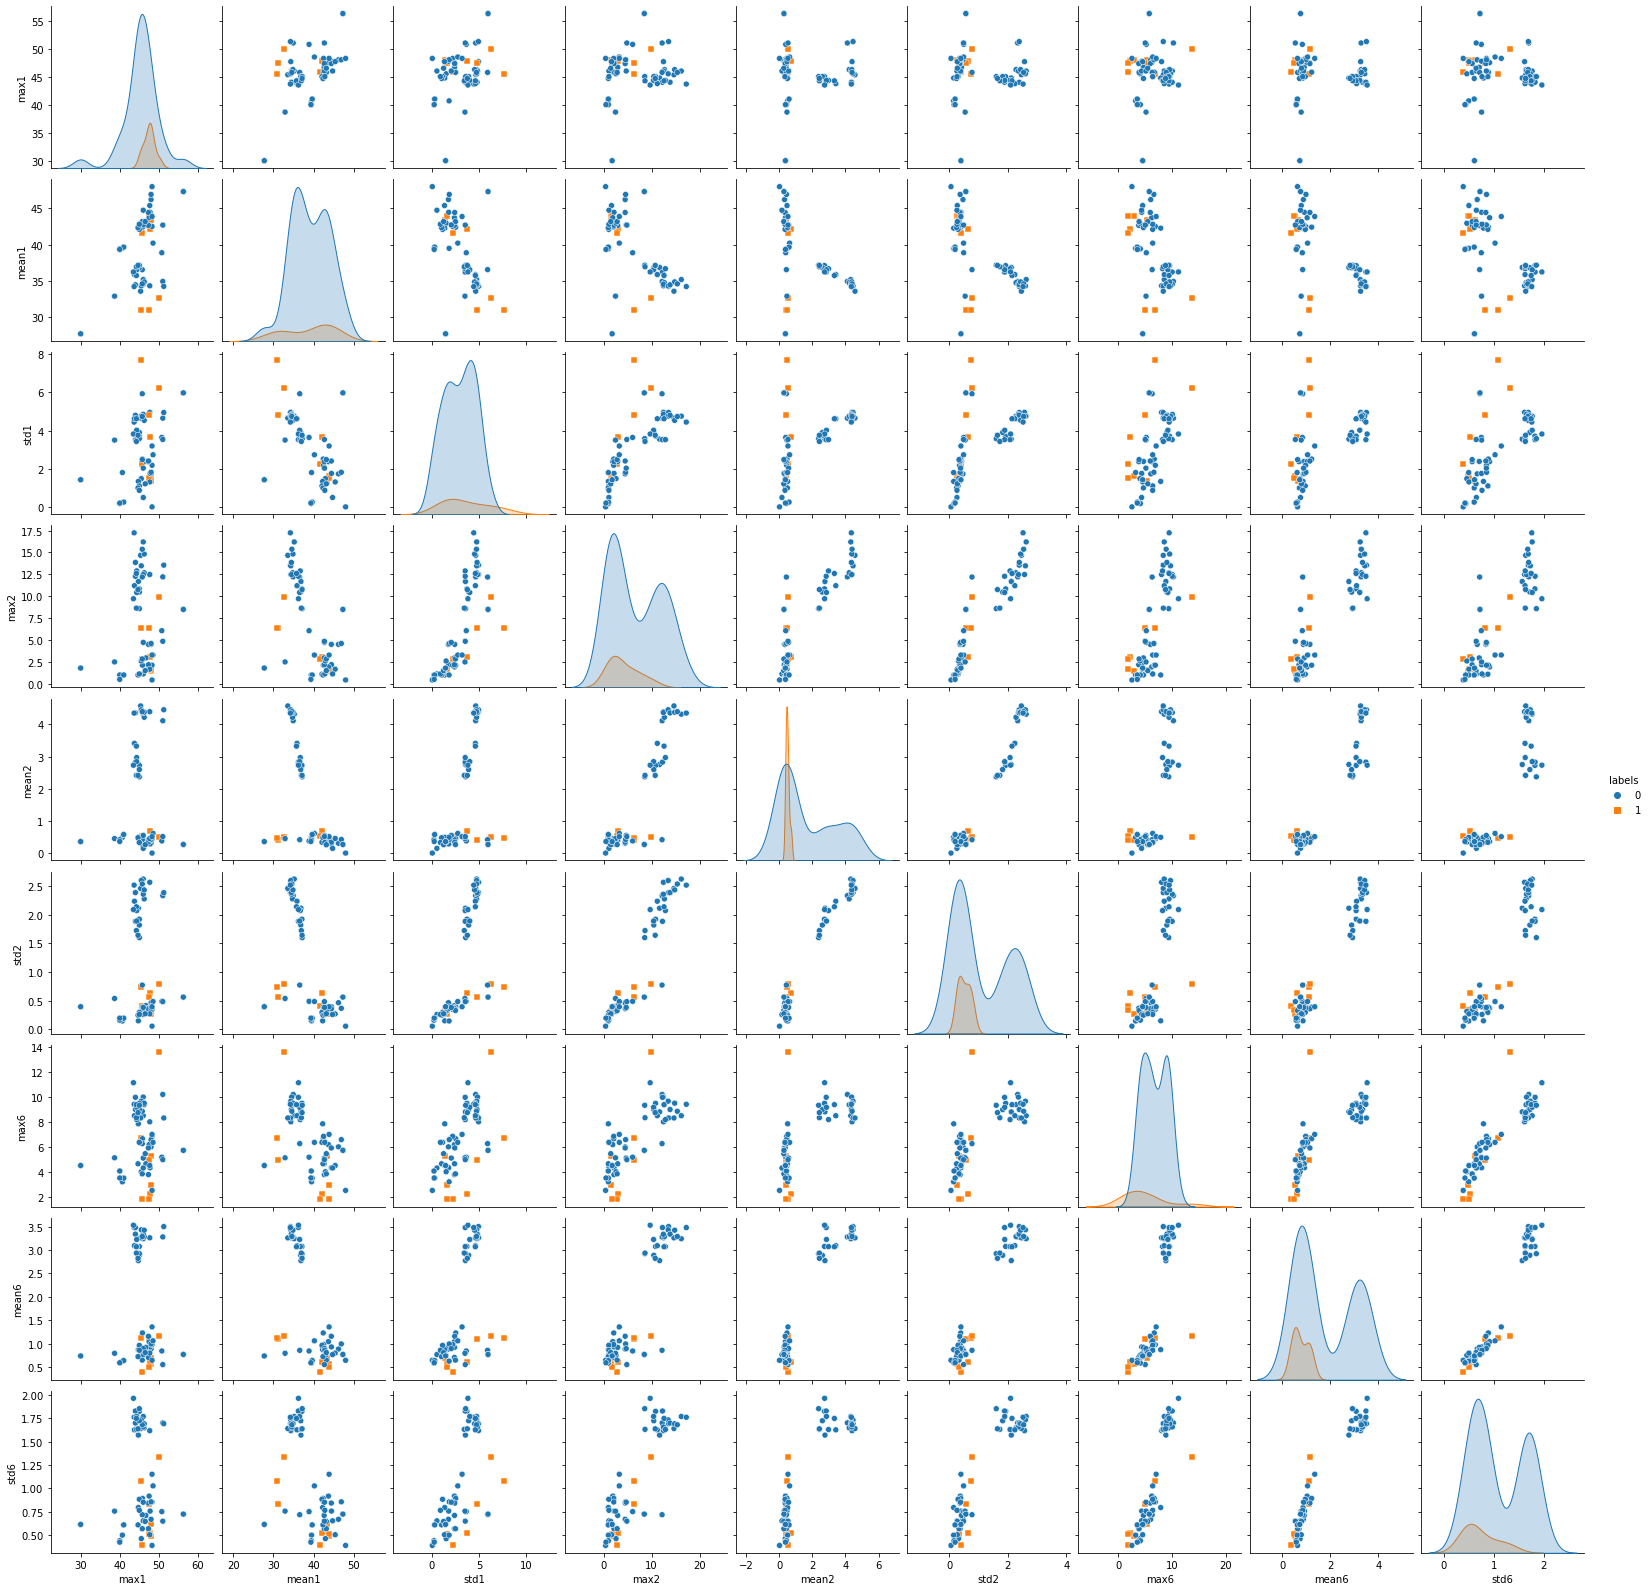

In [12]:
summ = { 'max1': max_time1, 'mean1': mean_time1, 'std1': std_time1,
        'max2': max_time2, 'mean2': mean_time2, 'std2': std_time2,
        'max6': max_time6, 'mean6': mean_time6, 'std6': std_time6, 
        'labels' : labels
       }

summ_df = pd.DataFrame(summ)
#seaborn.pairplot(summ_df, hue ='labels', markers=['o', 's'], palette='rocket')
seaborn.pairplot(summ_df, hue ='labels', markers=['o', 's'])
plt.show()

# 2. (a)
ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance

In [13]:
labels = []
max_time1, max_time2, max_time6 = [], [], []
mean_time1, mean_time2, mean_time6 = [], [], []
std_time1, std_time2, std_time6 = [], [], []
for file in (train_files):
    labels.append(1)
    df = pd.read_csv(file, skiprows=4, nrows = 240, error_bad_lines=False, warn_bad_lines=False)
    
    #max, mean and standard deviation are the most important time-domain features
    summary_time1 = df.describe()['avg_rss12']
    summary_time2 = df.describe()['var_rss12']
    summary_time6 = df.describe()['var_rss23']
    
    max1 = summary_time1['max']
    mean1 = summary_time1['mean']
    std1 = summary_time1['std']
    
    max2 = summary_time2['max']
    mean2 = summary_time2['mean']
    std2 = summary_time2['std']
    
    max6 = summary_time6['max']
    mean6 = summary_time6['mean']
    std6 = summary_time6['std']
    
    max_time1.append(max1) 
    max_time2.append(max2)
    max_time6.append(max6)
    
    mean_time1.append(mean1) 
    mean_time2.append(mean2)
    mean_time6.append(mean6)
    
    std_time1.append(std1) 
    std_time2.append(std2)
    std_time6.append(std6)
    
summ1 = { 'max1': max_time1, 'mean1': mean_time1, 'std1': std_time1,
        'max2': max_time2, 'mean2': mean_time2, 'std2': std_time2,
        'max6': max_time6, 'mean6': mean_time6, 'std6': std_time6, 
         'labels': labels
       }

summ_df1 = pd.DataFrame(summ1)

In [14]:
labels = []
max_time1, max_time2, max_time6 = [], [], []
mean_time1, mean_time2, mean_time6 = [], [], []
std_time1, std_time2, std_time6 = [], [], []
for file in (train_files):
    labels.append(0)
    df = pd.read_csv(file, skiprows=4, error_bad_lines=False, warn_bad_lines=False)
    for i in range(1,240):
        df.drop(index = i, inplace = True)
    #max, mean and standard deviation are the most important time-domain features
    summary_time1 = df.describe()['avg_rss12']
    summary_time2 = df.describe()['var_rss12']
    summary_time6 = df.describe()['var_rss23']
    
    max1 = summary_time1['max']
    mean1 = summary_time1['mean']
    std1 = summary_time1['std']
    
    max2 = summary_time2['max']
    mean2 = summary_time2['mean']
    std2 = summary_time2['std']
    
    max6 = summary_time6['max']
    mean6 = summary_time6['mean']
    std6 = summary_time6['std']
    
    max_time1.append(max1) 
    max_time2.append(max2)
    max_time6.append(max6)
    
    mean_time1.append(mean1) 
    mean_time2.append(mean2)
    mean_time6.append(mean6)
    
    std_time1.append(std1) 
    std_time2.append(std2)
    std_time6.append(std6)
    
summ2 = { 'max1': max_time1, 'mean1': mean_time1, 'std1': std_time1,
        'max2': max_time2, 'mean2': mean_time2, 'std2': std_time2,
        'max6': max_time6, 'mean6': mean_time6, 'std6': std_time6, 
         'labels': labels
       }

summ_df2 = pd.DataFrame(summ2)

https://www.geeksforgeeks.org/pandas-concat-function-in-python/  
https://datagy.io/pandas-drop-index-column/#:~:text=The%20most%20straightforward%20way%20to,a%20column%20in%20the%20dataframe


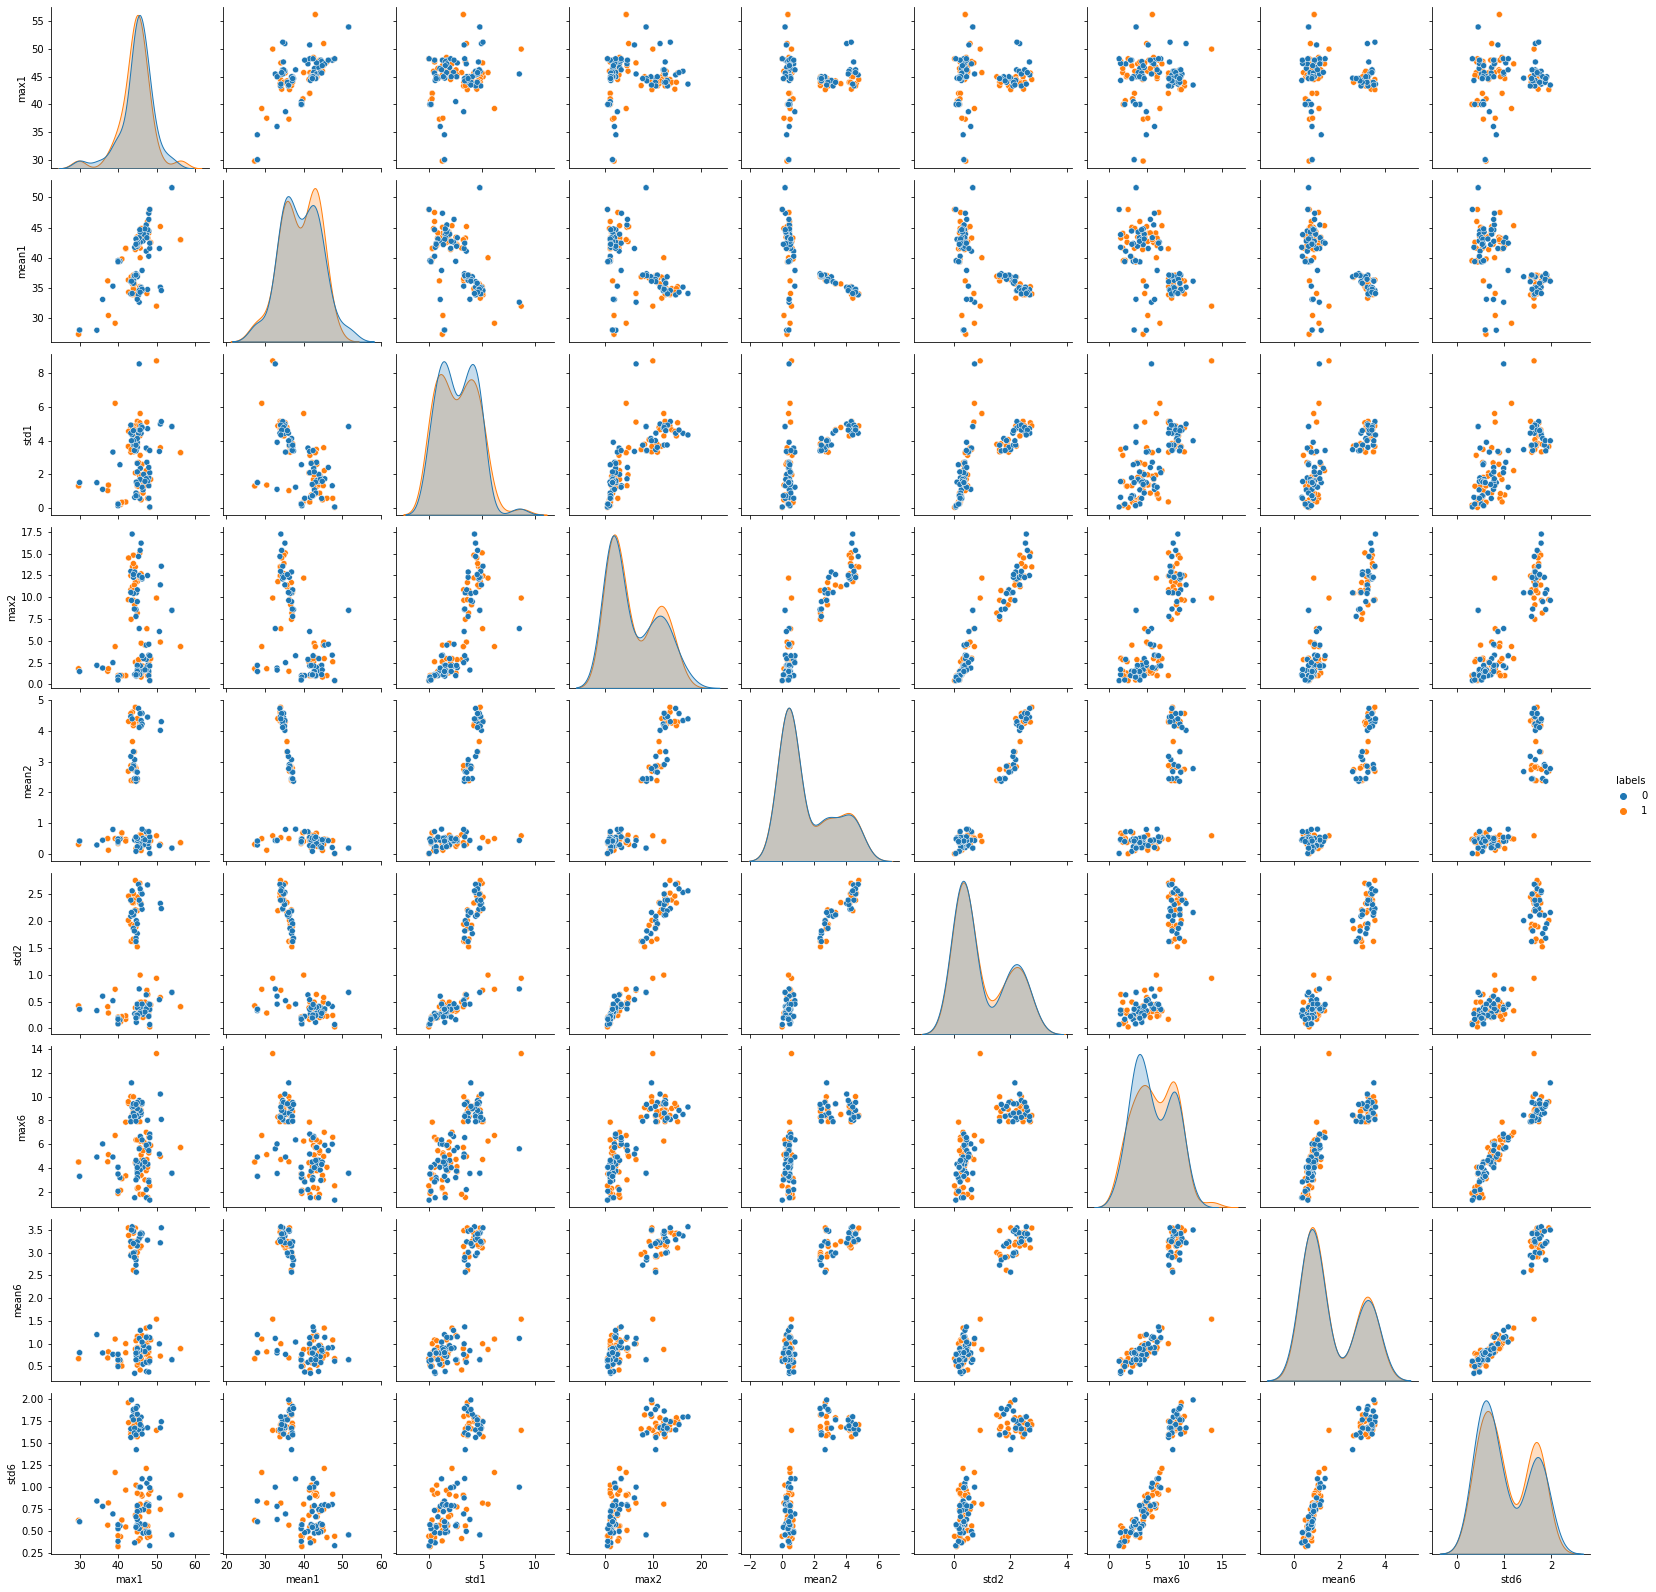

In [15]:
combine = pd.concat([pd.DataFrame(summ1), pd.DataFrame(summ2)], axis = 0)
combine = combine.reset_index(drop = True)
seaborn.pairplot(combine, hue ='labels')
plt.show()

After observing both the scatter plots, there does not appear to be that much of a difference. The plots appear to be very similar and there is no significant difference between them

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features.

https://stackoverflow.com/questions/29244286/how-to-flatten-a-2d-list-to-1d-without-using-numpy  
https://stackoverflow.com/questions/31645466/give-column-name-when-read-csv-file-pandas  
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe  
slicing the dataframe :  
https://stackoverflow.com/questions/19790790/splitting-dataframe-into-multiple-dataframes
https://www.activestate.com/resources/quick-reads/how-to-slice-a-dataframe-in-pandas/  

https://stackoverflow.com/questions/57115951/rounding-a-math-calculation-up-without-math-ceil

https://www.geeksforgeeks.org/python-pandas-dataframe-transpose/  
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/  
https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

rfecv : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html  
rfe : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
https://stackoverflow.com/questions/51412684/attributeerror-rfecv-object-has-no-attribute-ranking  

https://www.includehelp.com/python/how-to-select-all-columns-whose-name-start-with-a-particular-string-in-pandas-dataframe.aspx
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Explain what the right way and the wrong way are to perform cross-validation in this problem ?

The right way to perform cross validation is to perform cross validation and them perform feature selection on the dataset. Here the feature selection is done based on the results from the 5 fold stratified cross validation. 

The wrong way would be to choose the features aka perform feature selection and then to perform cross validation.

https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e  
I'm using stratified cross validation: we'll implement hold-out cross-validation with stratified sampling such that the training and the test sets have same proportion of the target variable. 

In [16]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

for l in range(1, 21):
    col = []
    for j in range(1, l*6+1):
        col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
    column_names = list(chain.from_iterable(col))
    
    dataset_df = pd.DataFrame(columns = column_names)
    for file in train_files: #trn: 
        folder = os.path.split(os.path.split(file)[0])[1]
        data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
        data.drop('time', axis=1, inplace=True)
        
        splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
        pointer = 0
        
        for val in range(l):
            if val ==  l-1:
                new = data.iloc[pointer: , :] 
            else: 
                #new = data.iloc[pointer: pointer + (480//i), : ]
                new = data.iloc[pointer: pointer + int(- (-480//l)), : ]
                
            pointer +=  int(- (-480//l))
            new_desc = new.describe().transpose()
            new_desc.drop('count', axis=1, inplace=True)
            #new_desc = new_desc[['min', 'max', 'mean', '50%', 'std', '25%', '75%']]
            splitting_df = splitting_df.append(new_desc)
            #splitting_df = splitting_df.append(new.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)) 


        splitting = splitting_df.to_numpy()
        splitting = splitting.reshape(1,-1)
        final_split_df = pd.DataFrame(splitting, columns = column_names)
      
        if folder in ('bending1','bending2'):
            final_split_df['labels'] = 1
        else:
            final_split_df['labels'] = 0
        dataset_df = dataset_df.append(final_split_df)
        
        
    dataset_df.fillna(0, inplace=True)
    dataset_df = dataset_df.reset_index(drop=True)
    cols = dataset_df.columns.str
    x_train = dataset_df.loc[:, cols.startswith(attr)]
    y_train = dataset_df.labels
    #x_train = dataset_df.iloc[:, :-1]
    #print(x_train)
    
    mod = LogisticRegression(solver = 'lbfgs', max_iter = 300)
    rfecv = RFECV(estimator = mod, cv = StratifiedKFold(5), scoring = 'accuracy', n_jobs = -1)
    rfecv = rfecv.fit(x_train, y_train)
    print("(l, p) = ({}, {})".format(l, sum(rfecv.support_)) )
    print("ranking = {}".format(max(rfecv.ranking_)))
        

(l, p) = (1, 4)
ranking = 15
(l, p) = (2, 1)
ranking = 36
(l, p) = (3, 2)
ranking = 53
(l, p) = (4, 5)
ranking = 68
(l, p) = (5, 2)
ranking = 89
(l, p) = (6, 1)
ranking = 108
(l, p) = (7, 4)
ranking = 123
(l, p) = (8, 2)
ranking = 143
(l, p) = (9, 1)
ranking = 162
(l, p) = (10, 2)
ranking = 179
(l, p) = (11, 3)
ranking = 196
(l, p) = (12, 1)
ranking = 216
(l, p) = (13, 2)
ranking = 233
(l, p) = (14, 2)
ranking = 251
(l, p) = (15, 2)
ranking = 269
(l, p) = (16, 1)
ranking = 288
(l, p) = (17, 1)
ranking = 306
(l, p) = (18, 3)
ranking = 322
(l, p) = (19, 1)
ranking = 342
(l, p) = (20, 1)
ranking = 360


In [17]:
#x_train

The best ranking is obtained of value 15 at l = 1 i.e. no split and the p value is 4. 
(l,p) = (1,4) is the best pair

# 2. (a).  
iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [18]:
col = []
l=1
attr = ('mean','max','std')
for j in range(1, 7):
    col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
column_names = list(chain.from_iterable(col))

dataset_df = pd.DataFrame(columns = column_names)
for file in train_files:
    folder = os.path.split(os.path.split(file)[0])[1]
    data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
    data.drop('time', axis=1, inplace=True)

    splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    pointer = 0

    for val in range(l):
        if val ==  l-1:
            new = data.iloc[pointer: , :] 
        else: 
            new = data.iloc[pointer: pointer + int(- (-480//l)), : ]

        pointer +=  int(- (-480//l))
        new_desc = new.describe().transpose()
        new_desc.drop('count', axis=1, inplace=True)
        #new_desc = new_desc[['min', 'max', 'mean', '50%', 'std', '25%', '75%']]
        splitting_df = splitting_df.append(new_desc)

    splitting = splitting_df.to_numpy()
    splitting = splitting.reshape(1,-1)
    final_split_df = pd.DataFrame(splitting, columns = column_names)
    if folder in ('bending1','bending2'):
        final_split_df['labels'] = 1
    else:
        final_split_df['labels'] = 0
    dataset_df = dataset_df.append(final_split_df)
    
dataset_df.fillna(0, inplace=True)
dataset_df = dataset_df.reset_index(drop=True)
cols = dataset_df.columns.str
x_train = dataset_df.iloc[:, cols.startswith(attr)]
y_train = dataset_df.labels

mod = LogisticRegression(solver = 'lbfgs', max_iter = 300)
rfecv = RFECV(estimator = mod, cv = StratifiedKFold(5), scoring = 'accuracy', n_jobs = -1)
rfecv = rfecv.fit(x_train, y_train)
support_feat = x_train.iloc[:, rfecv.support_]
#print(support_feat)


confusion matrix (from hw1) :  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  
https://stackoverflow.com/questions/67333158/is-there-a-way-to-draw-confusion-matrix-with-known-true-positive-true-negative

roc & auc :  
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Beta coeff using statsmodel Logit :
https://github.com/SuprajaKrovvidi/DSCI-552-Machine-Learning-for-Data-Science/blob/master/Homework3/notebook/DSCI552_HW3_Ruihao_Wang_9867439484.ipynb

In [19]:
def confusion_mat(model, X, y):
    pred = model.predict(X)
    confusion = confusion_matrix(y, pred)
    tn, fp, fn, tp = confusion[0][0], confusion[0][1], confusion[1][0], confusion[1][1]
    tp_rate = tp / (tp + fn)
    tn_rate = tn / (tn + fp)
    #seaborn.heatmap(confusion_mat,annot=True,annot_kws= {"size":20},cmap="Blues ")
    seaborn.heatmap(confusion, annot = True, annot_kws = {"size": 30}, cmap = 'viridis')
    plt.show()
    print("True positive rate: ", tp_rate)
    print("True negative rate: ", tn_rate)

In [20]:
def roc(model, X, y):
    probs = model.predict_proba(X)
    probs = probs[:, 1]
    fpr, tpr, _ = roc_curve(y, probs)
    plt.plot(fpr, tpr, label = 'ROC')
    plt.plot([0, 1], [0, 1], color = "green")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title("ROC Curve & AOC")
    plt.show()
    return auc(fpr, tpr)

FOR TRAINING DATA


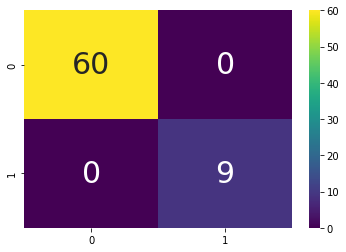

True positive rate:  1.0
True negative rate:  1.0
Cross-validation accuracy =  1.0


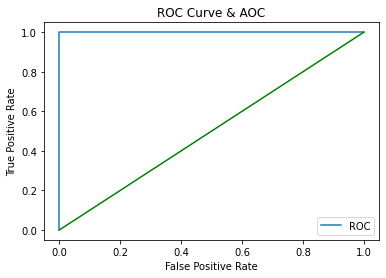

Area Under Curve =  1.0


In [21]:
print("FOR TRAINING DATA")
train_score = rfecv.score(x_train, y_train)
mod1 = LogisticRegression(C=100)
mod1_new = mod1.fit(support_feat, y_train)
confusion_mat(mod1_new, support_feat, y_train)
print("Cross-validation accuracy = ", train_score)

train_auc = roc(mod1_new, support_feat, y_train)

print("Area Under Curve = ", train_auc)

iv. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

Using Logit from stats models to give the Beta values and corressponding p values

In [22]:
lg = sm.Logit(y_train, support_feat).fit()
print(lg.summary())

         Current function value: 0.010046
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.9741
Time:                        19:04:34   Log-Likelihood:               -0.69315
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.924e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean1        -18.3815    1.8e+06  -1.02e-05      1.000   -3.53e+06    3.53e+06
max5          28.2744   3.17e+06   8.92e-06      1.000   -6.21e+0

/Users/anushkakamath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 2. (a)
v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

Running the classifier on test set. 

In [23]:
col = []
l=1
attr = ('mean','max','std')
for j in range(1, 7):
    col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
column_names = list(chain.from_iterable(col))

dataset_df = pd.DataFrame(columns = column_names)
for file in test_files:
    folder = os.path.split(os.path.split(file)[0])[1]
    data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
    data.drop('time', axis=1, inplace=True)

    splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    pointer = 0

    for val in range(l):
        if val ==  l-1:
            new = data.iloc[pointer: , :] 
        else: 
            new = data.iloc[pointer: pointer + int(- (-480//l)), : ]

        pointer +=  int(- (-480//l))
        new_desc = new.describe().transpose()
        new_desc.drop('count', axis=1, inplace=True)
        #new_desc = new_desc[['min', 'max', 'mean', '50%', 'std', '25%', '75%']]
        splitting_df = splitting_df.append(new_desc)

    splitting = splitting_df.to_numpy()
    splitting = splitting.reshape(1,-1)
    final_split_df = pd.DataFrame(splitting, columns = column_names)
    if folder in ('bending1','bending2'):
        final_split_df['labels'] = 1
    else:
        final_split_df['labels'] = 0
    dataset_df = dataset_df.append(final_split_df)
    
dataset_df.fillna(0, inplace=True)
dataset_df = dataset_df.reset_index(drop=True)
cols = dataset_df.columns.str
x_test = dataset_df.iloc[:, cols.startswith(attr)]
y_test = dataset_df.labels

mod = LogisticRegression(solver = 'lbfgs', max_iter = 300)
rfecv = RFECV(estimator = mod, cv = StratifiedKFold(5), scoring = 'accuracy', n_jobs = -1)
rfecv = rfecv.fit(x_test, y_test)
test_feat = x_test.iloc[:, rfecv.support_]
#print(test_feat.columns)


FOR TESTING DATA


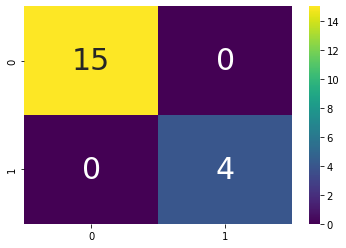

True positive rate:  1.0
True negative rate:  1.0


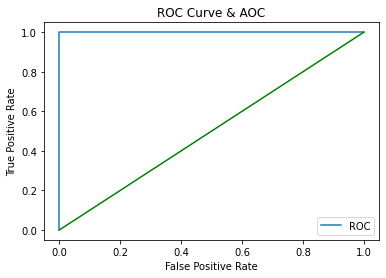

Area Under Curve =  1.0


In [24]:
print("FOR TESTING DATA")
mod2 = LogisticRegression(C=100)
mod2_new = mod2.fit(test_feat, y_test)
confusion_mat(mod2_new, test_feat, y_test)

probs = mod2_new.predict_proba(test_feat)
probs = probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label = 'ROC')
plt.plot([0, 1], [0, 1], color = "green")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("ROC Curve & AOC")
plt.show()
test_auc = auc(fpr, tpr)
print("Area Under Curve = ", test_auc)

In [25]:
print("Training accuracy after cross-validation = ",train_auc)
print("Testing accuracy after cross-validation = ",test_auc)

Training accuracy after cross-validation =  1.0
Testing accuracy after cross-validation =  1.0


# 2. (a)
vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?      
According to the Statsmodel Logit summary, only a fraction 0.99 of observations are well predicted. This depicts the instability in the logistic regression parameters. Due to this instability, some observations will not be identified and model is unstable.

vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.  

We observed the unstability in the model due to imbalanced classes from the Statsmodel Logit summary and from the confusion matrix. The non-bending has 60 observations and bending has 9 observations. The imbalance here is due to larger number of observations of non-bending vs bending class.
Since there is imbalance in the data, we use SMOTE to build a logistic regression model based on case-control sampling. As SMOTE can be used for both upsampling and downsampling the data

https://www.kaggle.com/code/ghanender/logistic-regression-class-imbalance-smote  
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/


In [26]:
sm = SMOTE(random_state = 2) 

In [27]:
X, y = sm.fit_resample(x_train, y_train.ravel())
# model_smote_lr = LogisticRegression() 
# model_smote_lr.fit(X, y.ravel()) 
model_smote_lr = LogisticRegression(solver='lbfgs', max_iter=300)
model_smote_lr = RFECV(estimator = model_smote_lr, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
model_smote_lr = rfecv.fit(X, y.ravel())
smote_feat = X.iloc[:, model_smote_lr.support_]

By using SMOTE for case controlled Sampling


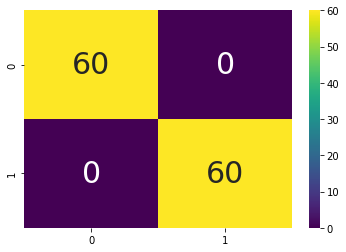

True positive rate:  1.0
True negative rate:  1.0


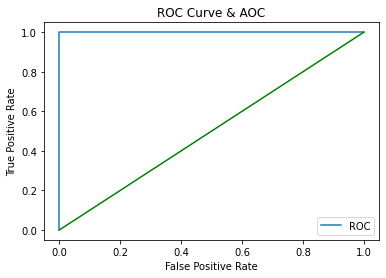

In [28]:
print("By using SMOTE for case controlled Sampling")
model3 = LogisticRegression(C=100)
model3_new = model3.fit(smote_feat, y)
confusion_mat(model3_new, smote_feat, y)
auc_smote = roc(model3_new, smote_feat, y)

# 2. (b) Binary Classification Using L1-penalized logistic regression
i. Repeat 2(a) iii using L1-penalized logistic regression, i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
https://numpy.org/doc/stable/reference/generated/numpy.logspace.html  
https://www.kaggle.com/general/271268  
https://stackoverflow.com/questions/34448288/using-l1-penalty-with-logisticregressioncv-in-scikit-learn



In [29]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

for l in range(1, 21):
    col = []
    for j in range(1, l*6+1):
        col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
    column_names = list(chain.from_iterable(col))
    
    dataset_df = pd.DataFrame(columns = column_names)
    for file in train_files: #trn: 
        folder = os.path.split(os.path.split(file)[0])[1]
        data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
        data.drop('time', axis=1, inplace=True)
        
        splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
        pointer = 0
        
        for val in range(l):
            if val ==  l-1:
                new = data.iloc[pointer: , :] 
            else: 
                new = data.iloc[pointer: pointer + int(- (-480//l)), : ]
                
            pointer +=  int(- (-480//l))
            new_desc = new.describe().transpose()
            new_desc.drop('count', axis=1, inplace=True)
            splitting_df = splitting_df.append(new_desc)

        splitting = splitting_df.to_numpy()
        splitting = splitting.reshape(1,-1)
        final_split_df = pd.DataFrame(splitting, columns = column_names)
      
        if folder in ('bending1','bending2'):
            final_split_df['labels'] = 1
        else:
            final_split_df['labels'] = 0
        dataset_df = dataset_df.append(final_split_df)
        
        
    dataset_df.fillna(0, inplace=True)
    dataset_df = dataset_df.reset_index(drop=True)
    cols = dataset_df.columns.str
    x_train = dataset_df.loc[:, cols.startswith(attr)]
    y_train = dataset_df.labels

    mod = LogisticRegressionCV(solver='liblinear', max_iter = 300, cv=StratifiedKFold(5), penalty='l1', n_jobs=-1, Cs = np.logspace(-1, 1, 20),)
    mod = mod.fit(x_train, y_train)

    print('split at l = ', l)
    print('max = ', mod.scores_[1].mean(axis=0).max())     

split at l =  1
max =  0.9571428571428571
split at l =  2
max =  0.9428571428571428
split at l =  3
max =  0.9428571428571428
split at l =  4
max =  0.9428571428571428
split at l =  5
max =  0.9285714285714285
split at l =  6
max =  0.9285714285714285
split at l =  7
max =  0.9428571428571428
split at l =  8
max =  0.9285714285714285
split at l =  9
max =  0.9428571428571428
split at l =  10
max =  0.9285714285714285
split at l =  11
max =  0.9285714285714285
split at l =  12
max =  0.9428571428571428
split at l =  13
max =  0.9428571428571428
split at l =  14
max =  0.9428571428571428
split at l =  15
max =  0.9285714285714285
split at l =  16
max =  0.9428571428571428
split at l =  17
max =  0.9285714285714285
split at l =  18
max =  0.9428571428571428
split at l =  19
max =  0.9428571428571428
split at l =  20
max =  0.9428571428571428


Highest accuracy = 95.71% at l = 1 i.e. when data is not split

In [30]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

l = 1
col = []
for j in range(1, l*6+1):
    col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
column_names = list(chain.from_iterable(col))

dataset_df = pd.DataFrame(columns = column_names)
for file in train_files: #trn: 
    folder = os.path.split(os.path.split(file)[0])[1]
    data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
    data.drop('time', axis=1, inplace=True)

    splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    pointer = 0

    for val in range(l):
        if val ==  l-1:
            new = data.iloc[pointer: , :] 
        else: 
            new = data.iloc[pointer: pointer + int(- (-480//l)), : ]

        pointer +=  int(- (-480//l))
        new_desc = new.describe().transpose()
        new_desc.drop('count', axis=1, inplace=True)
        splitting_df = splitting_df.append(new_desc)

    splitting = splitting_df.to_numpy()
    splitting = splitting.reshape(1,-1)
    final_split_df = pd.DataFrame(splitting, columns = column_names)

    if folder in ('bending1','bending2'):
        final_split_df['labels'] = 1
    else:
        final_split_df['labels'] = 0
    dataset_df = dataset_df.append(final_split_df)


dataset_df.fillna(0, inplace=True)
dataset_df = dataset_df.reset_index(drop=True)
cols = dataset_df.columns.str
x_train = dataset_df.loc[:, cols.startswith(attr)]
y_train = dataset_df.labels

mod = LogisticRegressionCV(solver='liblinear', max_iter = 300, cv=StratifiedKFold(5), penalty='l1', n_jobs=-1, Cs = np.logspace(-1, 1, 20),)
mod = mod.fit(x_train, y_train)

print('split at l = ', l)
print('max = ', mod.scores_[1].mean(axis=0).max())     

split at l =  1
max =  0.9571428571428571


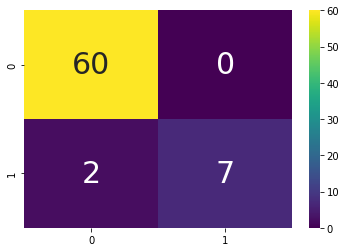

True positive rate:  0.7777777777777778
True negative rate:  1.0


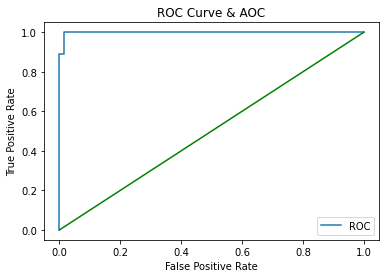

AOC =  0.9981481481481481


In [31]:
confusion_mat(mod, x_train, y_train)
auc_binl1 = roc(mod, x_train, y_train)
print("AOC = ", auc_binl1)

# 2. (b)
ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?  
Compared to L1-penalized, variable selection tends to perform better, here. However, L1 penalized was quicker and simpler to put into practice.
https://machinelearningmastery.com/multinomial-logistic-regression-with-python/  
https://stats.stackexchange.com/questions/3200/is-adjusting-p-values-in-a-multiple-regression-for-multiple-comparisons-a-good-i

# 2. (c) Multi-class Classification (The Realistic Case)
i. Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.


In [32]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

for l in range(1, 21):
    col = []
    for j in range(1, l*6+1):
        col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
    column_names = list(chain.from_iterable(col))
    
    dataset_df = pd.DataFrame(columns = column_names)
    for file in train_files: #trn: 
        folder = os.path.split(os.path.split(file)[0])[1]
        data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
        data.drop('time', axis=1, inplace=True)
        
        splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
        pointer = 0
        
        for val in range(l):
            if val ==  l-1:
                new = data.iloc[pointer: , :] 
            else: 
                new = data.iloc[pointer: pointer + int(- (-480//l)), : ]
                
            pointer +=  int(- (-480//l))
            new_desc = new.describe().transpose()
            new_desc.drop('count', axis=1, inplace=True)
            splitting_df = splitting_df.append(new_desc)

        splitting = splitting_df.to_numpy()
        splitting = splitting.reshape(1,-1)
        final_split_df = pd.DataFrame(splitting, columns = column_names)
        
#         if folder in ('bending1','bending2'):
#             final_split_df['labels'] = 1
#         else:
#             final_split_df['labels'] = 0
#         dataset_df = dataset_df.append(final_split_df)

        if folder in ('bending1','bending2'):
            final_split_df['labels'] = 1
        elif folder == 'cycling':
            final_split_df['labels'] = 2
        elif folder == 'lying':
            final_split_df['labels'] = 3
        elif folder == 'sitting':
            final_split_df['labels'] = 4
        elif folder == 'standing':
            final_split_df['labels'] = 5
        elif folder == 'walking':
            final_split_df['labels'] = 6
        dataset_df = dataset_df.append(final_split_df)
     

    dataset_df.fillna(0, inplace=True)
    dataset_df = dataset_df.reset_index(drop=True)
    cols = dataset_df.columns.str
    x_train = dataset_df.loc[:, cols.startswith(attr)]
    y_train = dataset_df.labels

    mod = LogisticRegressionCV(solver='saga', max_iter = 300, cv=StratifiedKFold(5), multi_class='multinomial', penalty='l1', n_jobs=-1, Cs = np.logspace(-1, 1, 20),)
    mod = mod.fit(x_train, y_train)
    score_l1 = mod.score(x_train, y_train)
    print('split at l = ', l)
    print('max accuracy = ', score_l1)     

split at l =  1
max accuracy =  0.927536231884058
split at l =  2
max accuracy =  1.0
split at l =  3
max accuracy =  1.0
split at l =  4
max accuracy =  1.0
split at l =  5
max accuracy =  1.0
split at l =  6
max accuracy =  1.0
split at l =  7
max accuracy =  1.0
split at l =  8
max accuracy =  1.0
split at l =  9
max accuracy =  1.0
split at l =  10
max accuracy =  1.0
split at l =  11
max accuracy =  0.9855072463768116
split at l =  12
max accuracy =  1.0
split at l =  13
max accuracy =  1.0
split at l =  14
max accuracy =  0.9855072463768116
split at l =  15
max accuracy =  1.0
split at l =  16
max accuracy =  1.0
split at l =  17
max accuracy =  1.0
split at l =  18
max accuracy =  1.0
split at l =  19
max accuracy =  1.0
split at l =  20
max accuracy =  1.0


Accuracy is max of 100% for L1- penalized multinomial regression model with mutiple classes at l = 2

In [33]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

l=2
col = []
for j in range(1, l*6+1):
    col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
column_names = list(chain.from_iterable(col))

dataset_df = pd.DataFrame(columns = column_names)
for file in test_files: 
    folder = os.path.split(os.path.split(file)[0])[1]
    data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
    data.drop('time', axis=1, inplace=True)

    splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    pointer = 0

    for val in range(l):
        if val ==  l-1:
            new = data.iloc[pointer: , :] 
        else: 
            new = data.iloc[pointer: pointer + int(- (-480//l)), : ]

        pointer +=  int(- (-480//l))
        new_desc = new.describe().transpose()
        new_desc.drop('count', axis=1, inplace=True)
        splitting_df = splitting_df.append(new_desc)

    splitting = splitting_df.to_numpy()
    splitting = splitting.reshape(1,-1)
    final_split_df = pd.DataFrame(splitting, columns = column_names)

#     if folder in ('bending1','bending2'):
#         final_split_df['labels'] = 1
#     else:
#         final_split_df['labels'] = 0
#     dataset_df = dataset_df.append(final_split_df)

    if folder in ('bending1','bending2'):
            final_split_df['labels'] = 1
    elif folder == 'cycling':
        final_split_df['labels'] = 2
    elif folder == 'lying':
        final_split_df['labels'] = 3
    elif folder == 'sitting':
        final_split_df['labels'] = 4
    elif folder == 'standing':
        final_split_df['labels'] = 5
    elif folder == 'walking':
        final_split_df['labels'] = 6
    dataset_df = dataset_df.append(final_split_df)


dataset_df.fillna(0, inplace=True)
dataset_df = dataset_df.reset_index(drop=True)
cols = dataset_df.columns.str
x_test = dataset_df.loc[:, cols.startswith(attr)]
y_test = dataset_df.labels

mod = LogisticRegressionCV(solver='saga', max_iter = 300, cv=StratifiedKFold(3), multi_class='multinomial', penalty='l1', n_jobs=-1, Cs = np.logspace(-1, 1, 20),)
mod = mod.fit(x_test, y_test)
score_l1 = mod.score(x_test, y_test)
print("L1- penalized multinomial regression model")
print('split at l = ', l)
print('Testing accuracy = ', score_l1)
print('Testing error = ', 1 - score_l1)  

L1- penalized multinomial regression model
split at l =  2
Testing accuracy =  0.9473684210526315
Testing error =  0.052631578947368474


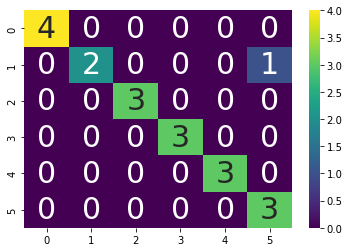

True positive rate:  1.0
True negative rate:  1.0


In [34]:
confusion_mat(mod, x_test, y_test)
#auc_multi = roc(mod, x_test, y_test)
#print("AOC = ", auc_multi)

The confusion matrix for a multi class model is as shown above. However, the ROC and AUC curve can be represented in a 2D plane as area under the ROC curve. 
However, in case of a multi - dimensional model. Representing the ROC and AUC in 2 dimensional plane is not possible as it will be a volume under the ROC surface. Reference papers for the same below.  
https://stats.stackexchange.com/questions/2151/how-to-plot-roc-curves-in-multiclass-classification  

Another approach to plot the ROC curve and AUC is to convert it to binary by using OneVsAll approach, so we'll have n_class number of ROC curves
https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

# 2. (b)
ii. Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

GAUSSIAN  
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html  
https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.naive_bayes.GaussianNB.html  
https://www.tutorialspoint.com/scikit_learn/scikit_learn_gaussian_naive_bayes.htm  
https://stats.stackexchange.com/questions/142505/how-to-use-naive-bayes-for-multi-class-problems

In [35]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

for l in range(1, 21):
    col = []
    for j in range(1, l*6+1):
        col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
    column_names = list(chain.from_iterable(col))
    
    dataset_df = pd.DataFrame(columns = column_names)
    for file in train_files: #trn: 
        folder = os.path.split(os.path.split(file)[0])[1]
        data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
        data.drop('time', axis=1, inplace=True)
        
        splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
        pointer = 0
        
        for val in range(l):
            if val ==  l-1:
                new = data.iloc[pointer: , :] 
            else: 
                new = data.iloc[pointer: pointer + int(- (-480//l)), : ]
                
            pointer +=  int(- (-480//l))
            new_desc = new.describe().transpose()
            new_desc.drop('count', axis=1, inplace=True)
            splitting_df = splitting_df.append(new_desc)

        splitting = splitting_df.to_numpy()
        splitting = splitting.reshape(1,-1)
        final_split_df = pd.DataFrame(splitting, columns = column_names)
        
        if folder in ('bending1','bending2'):
            final_split_df['labels'] = 1
        elif folder == 'cycling':
            final_split_df['labels'] = 2
        elif folder == 'lying':
            final_split_df['labels'] = 3
        elif folder == 'sitting':
            final_split_df['labels'] = 4
        elif folder == 'standing':
            final_split_df['labels'] = 5
        elif folder == 'walking':
            final_split_df['labels'] = 6
        dataset_df = dataset_df.append(final_split_df)
      
#         if folder in ('bending1','bending2'):
#             final_split_df['labels'] = 1
#         else:
#             final_split_df['labels'] = 0
#         dataset_df = dataset_df.append(final_split_df)
        
    dataset_df.fillna(0, inplace=True)
    dataset_df = dataset_df.reset_index(drop=True)
    cols = dataset_df.columns.str
    x_train = dataset_df.loc[:, cols.startswith(attr)]
    y_train = dataset_df.labels
   
    model = GaussianNB()
    model = model.fit(x_train, y_train)
    score_gauss = model.score(x_train, y_train)
    print("Split at l = ", l)
    print("Accuracy = ", score_gauss)

Split at l =  1
Accuracy =  0.9855072463768116
Split at l =  2
Accuracy =  0.9855072463768116
Split at l =  3
Accuracy =  0.9855072463768116
Split at l =  4
Accuracy =  0.9855072463768116
Split at l =  5
Accuracy =  0.9855072463768116
Split at l =  6
Accuracy =  0.9710144927536232
Split at l =  7
Accuracy =  0.9710144927536232
Split at l =  8
Accuracy =  0.9710144927536232
Split at l =  9
Accuracy =  0.9710144927536232
Split at l =  10
Accuracy =  0.9710144927536232
Split at l =  11
Accuracy =  0.9710144927536232
Split at l =  12
Accuracy =  0.9710144927536232
Split at l =  13
Accuracy =  0.9710144927536232
Split at l =  14
Accuracy =  0.9855072463768116
Split at l =  15
Accuracy =  0.9855072463768116
Split at l =  16
Accuracy =  0.9855072463768116
Split at l =  17
Accuracy =  0.9710144927536232
Split at l =  18
Accuracy =  0.9710144927536232
Split at l =  19
Accuracy =  0.9855072463768116
Split at l =  20
Accuracy =  0.9855072463768116


Accuracy is max of 98 % at l = 1 i.e. when there is no split

In [36]:
from sklearn.naive_bayes import GaussianNB
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

l = 1
col = []
for j in range(1, l*6+1):
    col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
column_names = list(chain.from_iterable(col))

dataset_df = pd.DataFrame(columns = column_names)
for file in test_files:
    folder = os.path.split(os.path.split(file)[0])[1]
    data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
    data.drop('time', axis=1, inplace=True)

    splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    pointer = 0

    for val in range(l):
        if val ==  l-1:
            new = data.iloc[pointer: , :] 
        else: 
            new = data.iloc[pointer: pointer + int(- (-480//l)), : ]

        pointer +=  int(- (-480//l))
        new_desc = new.describe().transpose()
        new_desc.drop('count', axis=1, inplace=True)
        splitting_df = splitting_df.append(new_desc)

    splitting = splitting_df.to_numpy()
    splitting = splitting.reshape(1,-1)
    final_split_df = pd.DataFrame(splitting, columns = column_names)

#     if folder in ('bending1','bending2'):
#         final_split_df['labels'] = 1
#     else:
#         final_split_df['labels'] = 0
    if folder in ('bending1','bending2'):
        final_split_df['labels'] = 1
    elif folder == 'cycling':
        final_split_df['labels'] = 2
    elif folder == 'lying':
        final_split_df['labels'] = 3
    elif folder == 'sitting':
        final_split_df['labels'] = 4
    elif folder == 'standing':
        final_split_df['labels'] = 5
    elif folder == 'walking':
        final_split_df['labels'] = 6
    dataset_df = dataset_df.append(final_split_df)


dataset_df.fillna(0, inplace=True)
dataset_df = dataset_df.reset_index(drop=True)
cols = dataset_df.columns.str
x_test = dataset_df.loc[:, cols.startswith(attr)]
y_test = dataset_df.labels

model = GaussianNB()
model = model.fit(x_test, y_test)
score_gauss = model.score(x_test, y_test)
print("GAUSSIAN Naive Bayes’ classifier")
print("Accuracy = ", score_gauss)
print("Testing error = ", 1-score_gauss)

GAUSSIAN Naive Bayes’ classifier
Accuracy =  1.0
Testing error =  0.0


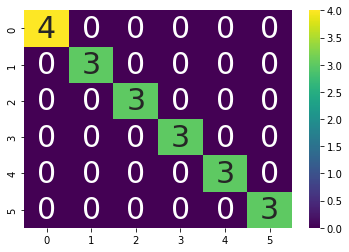

True positive rate:  1.0
True negative rate:  1.0


In [37]:
confusion_mat(model, x_test, y_test)
#auc_gauss = roc(model, x_test, y_test)
#print("AOC = ", auc_gauss)

The confusion matrix for a multi class model is as shown above. However, the ROC and AUC curve can be represented in a 2D plane as area under the ROC curve. 
However, in case of a multi - dimensional model. Representing the ROC and AUC in 2 dimensional plane is not possible as it will be a volume under the ROC surface. Reference papers for the same below.  
https://stats.stackexchange.com/questions/2151/how-to-plot-roc-curves-in-multiclass-classification  

Another approach to plot the ROC curve and AUC is to convert it to binary by using OneVsAll approach, so we'll have n_class number of ROC curves
https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

MULTI NOMIAL

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html  
https://www.tutorialspoint.com/scikit_learn/scikit_learn_multinomial_naive_bayes.htm

In [38]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

for l in range(1, 21):
    col = []
    for j in range(1, l*6+1):
        col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
    column_names = list(chain.from_iterable(col))
    
    dataset_df = pd.DataFrame(columns = column_names)
    for file in train_files: #trn: 
        folder = os.path.split(os.path.split(file)[0])[1]
        data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
        data.drop('time', axis=1, inplace=True)
        
        splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
        pointer = 0
        
        for val in range(l):
            if val ==  l-1:
                new = data.iloc[pointer: , :] 
            else: 
                new = data.iloc[pointer: pointer + int(- (-480//l)), : ]
                
            pointer +=  int(- (-480//l))
            new_desc = new.describe().transpose()
            new_desc.drop('count', axis=1, inplace=True)
            splitting_df = splitting_df.append(new_desc)

        splitting = splitting_df.to_numpy()
        splitting = splitting.reshape(1,-1)
        final_split_df = pd.DataFrame(splitting, columns = column_names)
      
#         if folder in ('bending1','bending2'):
#             final_split_df['labels'] = 1
#         else:
#             final_split_df['labels'] = 0
        if folder in ('bending1','bending2'):
            final_split_df['labels'] = 1
        elif folder == 'cycling':
            final_split_df['labels'] = 2
        elif folder == 'lying':
            final_split_df['labels'] = 3
        elif folder == 'sitting':
            final_split_df['labels'] = 4
        elif folder == 'standing':
            final_split_df['labels'] = 5
        elif folder == 'walking':
            final_split_df['labels'] = 6
        dataset_df = dataset_df.append(final_split_df)
        
    dataset_df.fillna(0, inplace=True)
    dataset_df = dataset_df.reset_index(drop=True)
    cols = dataset_df.columns.str
    x_train = dataset_df.loc[:, cols.startswith(attr)]
    y_train = dataset_df.labels
   
    model = MultinomialNB()
    model = model.fit(x_train, y_train)
    score_multi = model.score(x_train, y_train)
    
    print("Split at l = ", l)
    print("Accuracy = ", score_multi)

Split at l =  1
Accuracy =  0.8840579710144928
Split at l =  2
Accuracy =  0.927536231884058
Split at l =  3
Accuracy =  0.9130434782608695
Split at l =  4
Accuracy =  0.927536231884058
Split at l =  5
Accuracy =  0.9130434782608695
Split at l =  6
Accuracy =  0.9130434782608695
Split at l =  7
Accuracy =  0.9130434782608695
Split at l =  8
Accuracy =  0.927536231884058
Split at l =  9
Accuracy =  0.927536231884058
Split at l =  10
Accuracy =  0.927536231884058
Split at l =  11
Accuracy =  0.9565217391304348
Split at l =  12
Accuracy =  0.9565217391304348
Split at l =  13
Accuracy =  0.9565217391304348
Split at l =  14
Accuracy =  0.9565217391304348
Split at l =  15
Accuracy =  0.9565217391304348
Split at l =  16
Accuracy =  0.9565217391304348
Split at l =  17
Accuracy =  0.9565217391304348
Split at l =  18
Accuracy =  0.9710144927536232
Split at l =  19
Accuracy =  0.9565217391304348
Split at l =  20
Accuracy =  0.9565217391304348


Accuracy is max of 97.1% for Multinomial Naive Bayes at l = 18

In [39]:
dataset_col = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
attr = ('mean','max','std')

l=18
col = []
for j in range(1, l*6+1):
    col.append(['min' + str(j), 'max' + str(j), 'mean' + str(j), 'median' + str(j), 'std' + str(j), '1stquart' + str(j), '3rdquart' + str(j)])
column_names = list(chain.from_iterable(col))

dataset_df = pd.DataFrame(columns = column_names)
for file in test_files: #trn: 
    folder = os.path.split(os.path.split(file)[0])[1]
    data = pd.read_csv(file, skiprows = 5, names = dataset_col, header=None, error_bad_lines=False, warn_bad_lines=False)
    data.drop('time', axis=1, inplace=True)

    splitting_df = pd.DataFrame(columns = ['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    pointer = 0

    for val in range(l):
        if val ==  l-1:
            new = data.iloc[pointer: , :] 
        else: 
            new = data.iloc[pointer: pointer + int(- (-480//l)), : ]

        pointer +=  int(- (-480//l))
        new_desc = new.describe().transpose()
        new_desc.drop('count', axis=1, inplace=True)
        splitting_df = splitting_df.append(new_desc)

    splitting = splitting_df.to_numpy()
    splitting = splitting.reshape(1,-1)
    final_split_df = pd.DataFrame(splitting, columns = column_names)

#     if folder in ('bending1','bending2'):
#         final_split_df['labels'] = 1
#     else:
#         final_split_df['labels'] = 0
    if folder in ('bending1','bending2'):
        final_split_df['labels'] = 1
    elif folder == 'cycling':
        final_split_df['labels'] = 2
    elif folder == 'lying':
        final_split_df['labels'] = 3
    elif folder == 'sitting':
        final_split_df['labels'] = 4
    elif folder == 'standing':
        final_split_df['labels'] = 5
    elif folder == 'walking':
        final_split_df['labels'] = 6
    dataset_df = dataset_df.append(final_split_df)


dataset_df.fillna(0, inplace=True)
dataset_df = dataset_df.reset_index(drop=True)
cols = dataset_df.columns.str
x_test = dataset_df.loc[:, cols.startswith(attr)]
y_test = dataset_df.labels

model = MultinomialNB()
model = model.fit(x_test, y_test)
score_multi = model.score(x_test, y_test)
print("Multinomial Naive Bayes’ classifier")
print("Split at l = ", l)
print("Accuracy = ", score_multi)
print("Testing Error = ", 1-score_multi)

Multinomial Naive Bayes’ classifier
Split at l =  18
Accuracy =  0.9473684210526315
Testing Error =  0.052631578947368474


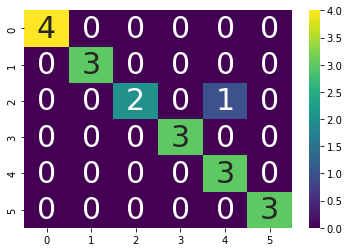

True positive rate:  1.0
True negative rate:  1.0


In [40]:
confusion_mat(model, x_test, y_test)
#auc_gauss = roc(model, x_test, y_test)
#print("AOC = ", auc_gauss)

The confusion matrix for a multi class model is as shown above. However, the ROC and AUC curve can be represented in a 2D plane as area under the ROC curve. 
However, in case of a multi - dimensional model. Representing the ROC and AUC in 2 dimensional plane is not possible as it will be a volume under the ROC surface. Reference papers for the same below.  
https://stats.stackexchange.com/questions/2151/how-to-plot-roc-curves-in-multiclass-classification  

Another approach to plot the ROC curve and AUC is to convert it to binary by using OneVsAll approach, so we'll have n_class number of ROC curves
https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

iii. Which method is better for multi-class classification in this problem?

In [41]:
data = [['L1 Penalized Multinomial Regression', 2, score_l1],
        ['Gaussian Naive Bayes', 1, score_gauss],
        ['Multinomial Naive Bayes', 18, score_multi]
       ]

df = pd.DataFrame(data, columns=['Model', 'Split', 'Testing Accuarcy'])
print(df)

                                 Model  Split  Testing Accuarcy
0  L1 Penalized Multinomial Regression      2          0.947368
1                 Gaussian Naive Bayes      1          1.000000
2              Multinomial Naive Bayes     18          0.947368


Thus, above mentioned are the testing accuracies and split l values for all three models. 
Hence, Gaussian Naive Bayes is the best method for multi-class classification

# 3. ISLR 4.8.3
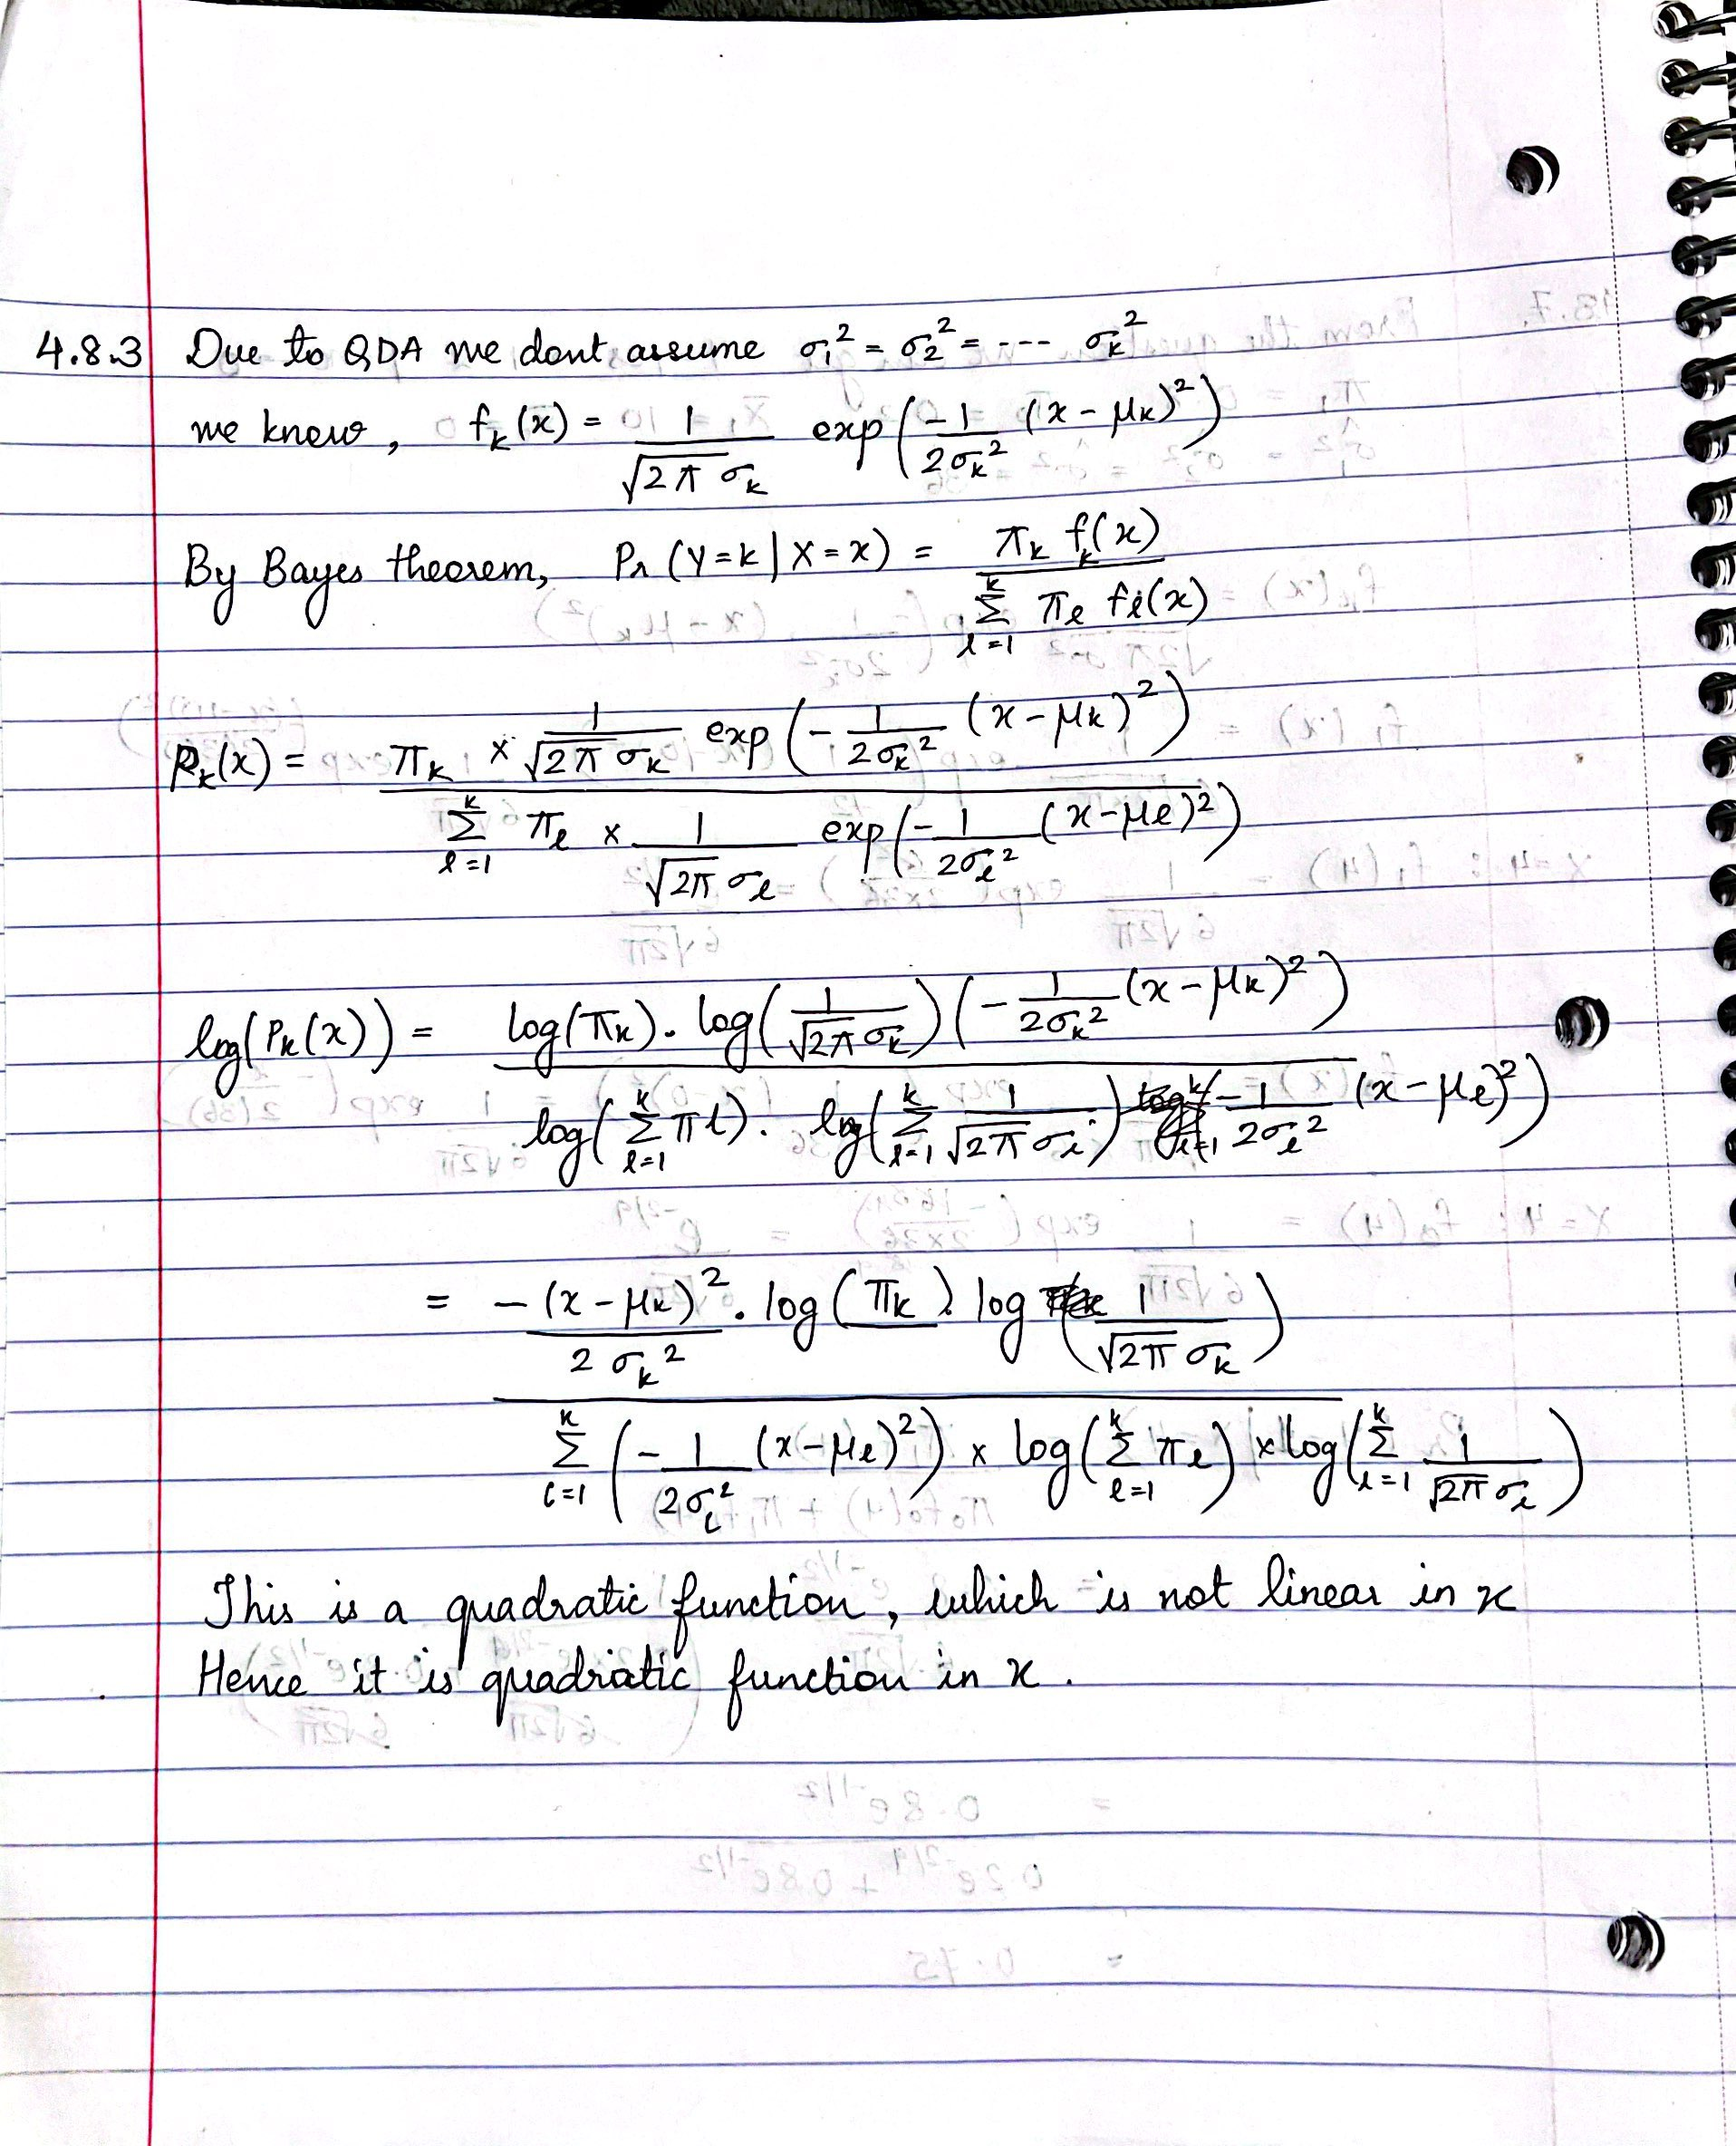


# 4. ISLR 4.8.7
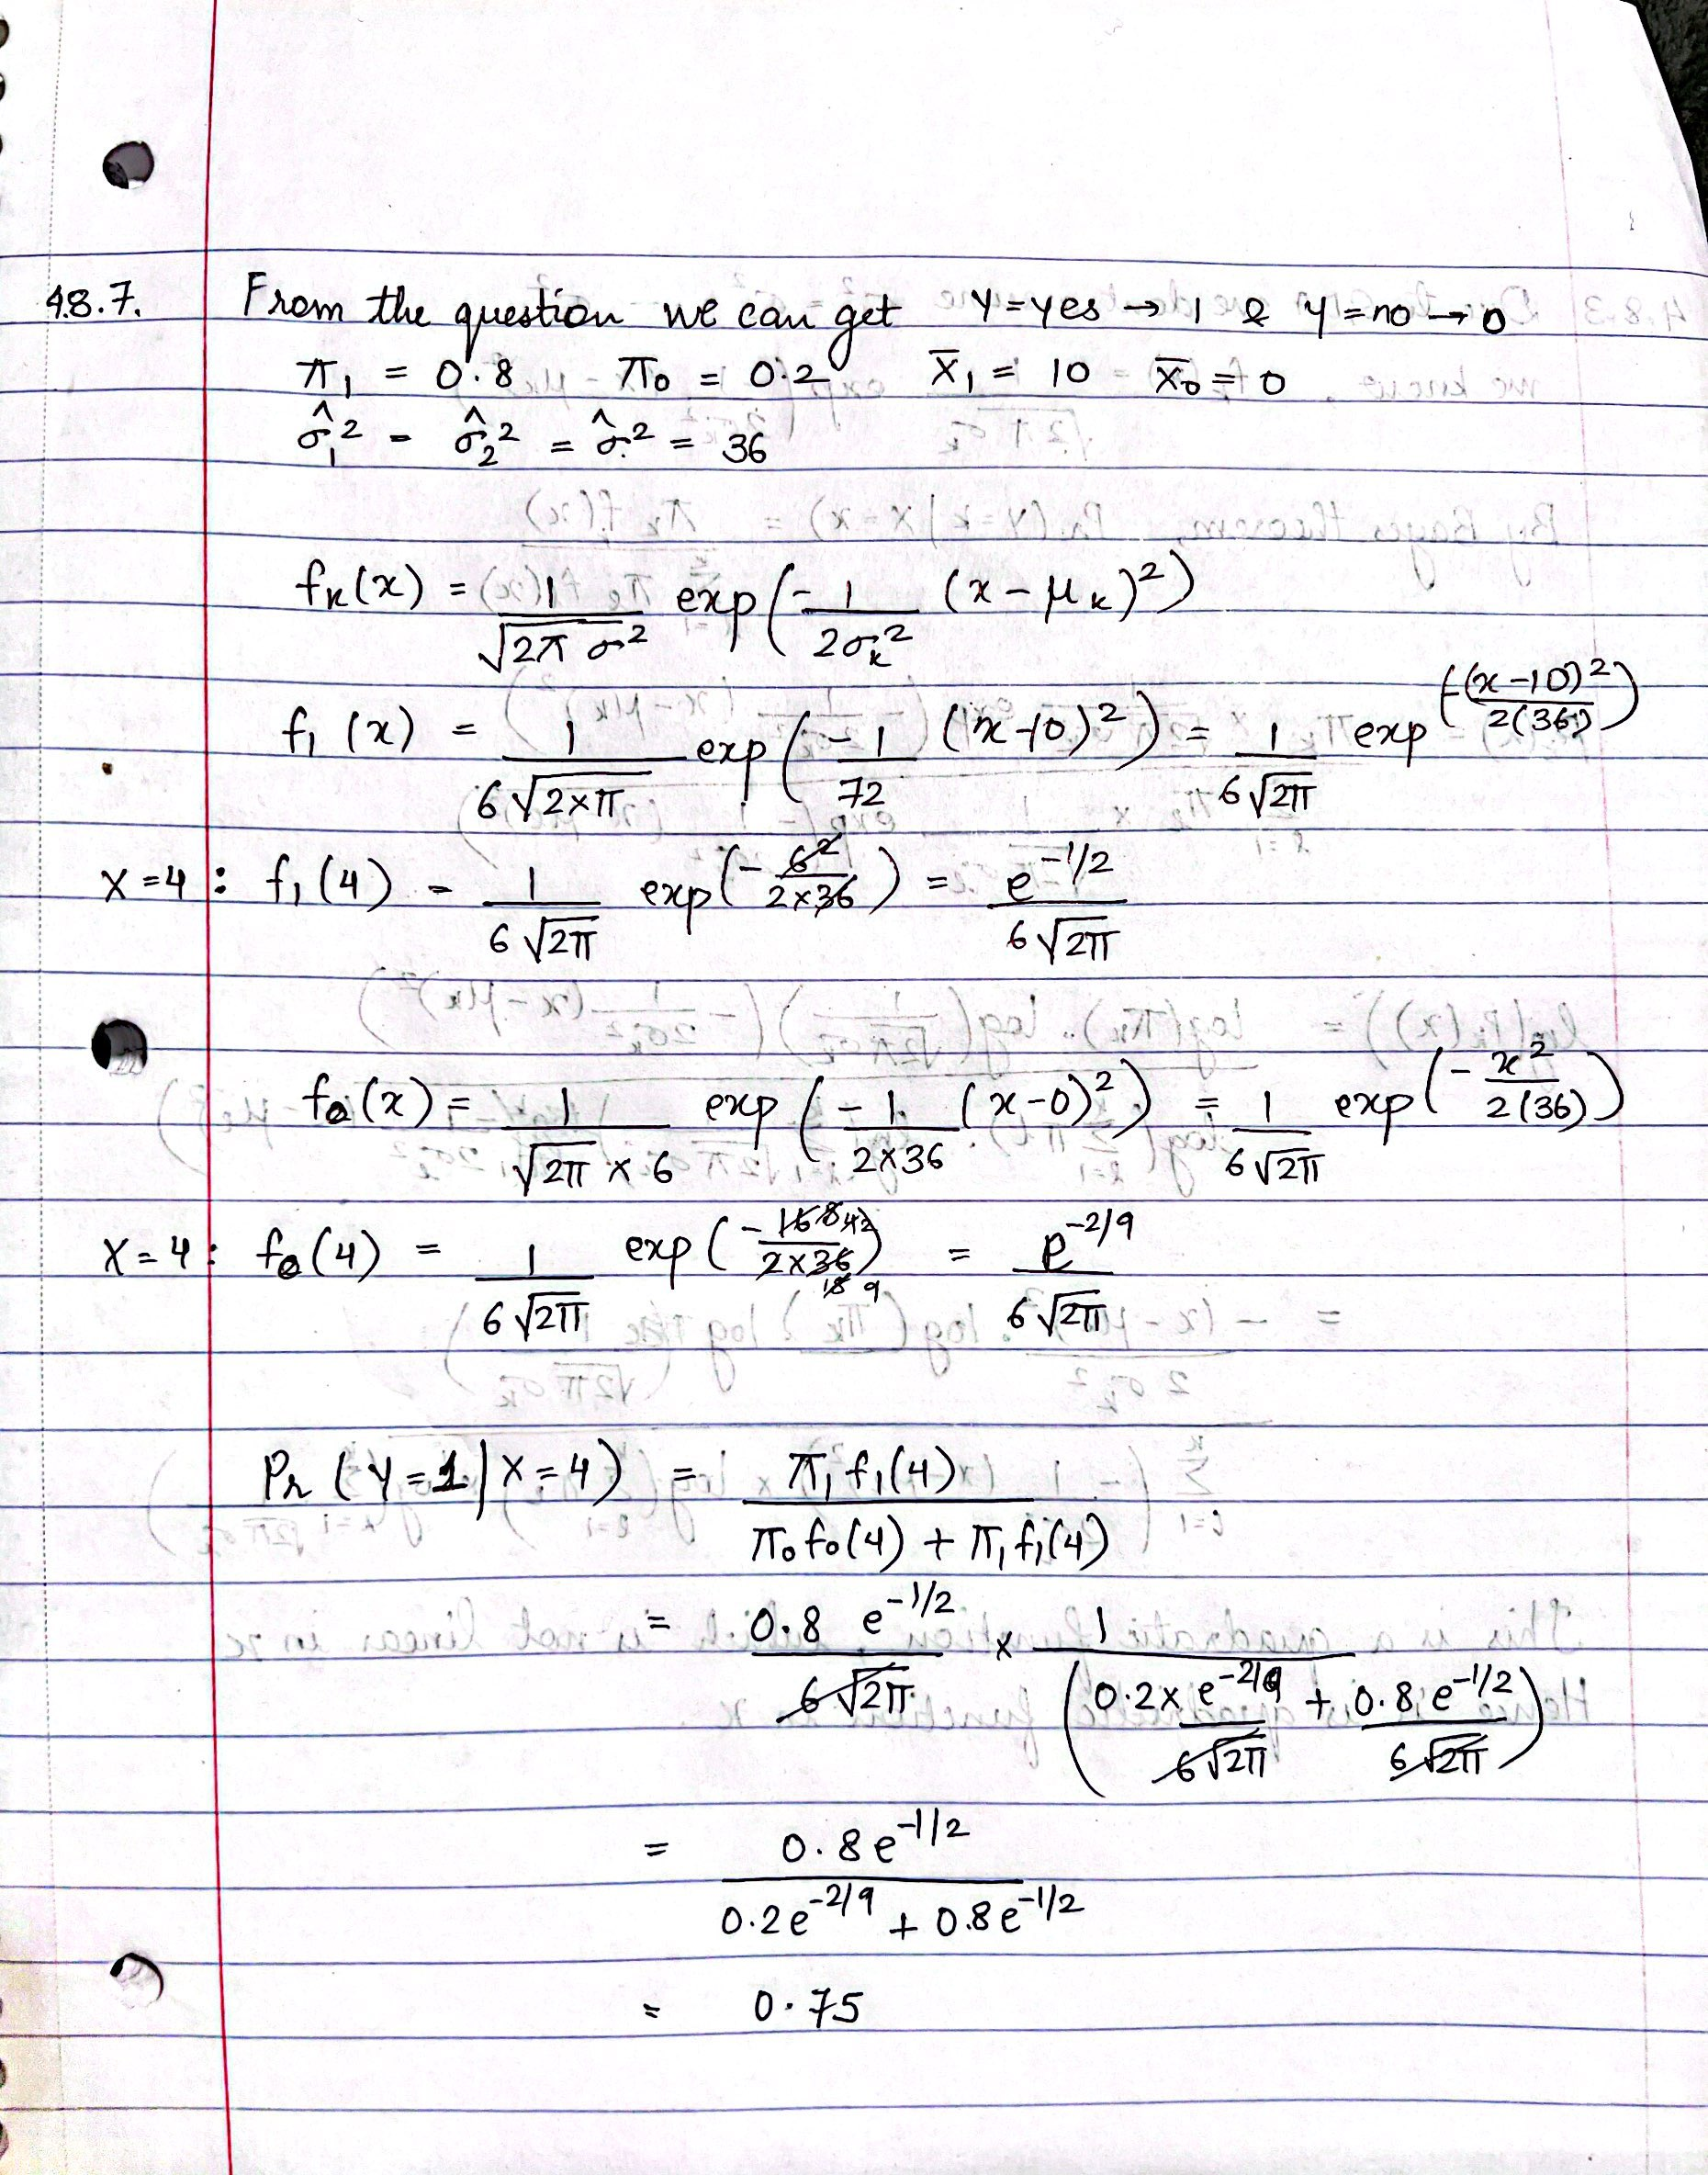